In [1]:
%config Completer.use_jedi = False
import warnings
warnings.filterwarnings(action='ignore')

회귀 신경망 실습  
신경망을 이용해 보스턴 집값 데이터를 활용해 보스턴 집값을 에측하는 모형을 만들어본다.

In [2]:
# 일관된 결과값이 나오도록 random seed를 설정한다.
import numpy as np
import tensorflow as tf
np.random.seed(0)
tf.random.set_seed(0)

In [3]:
# 데이터 불러오기
from sklearn import datasets # 보스턴 집값 데이터를 사용하기 위해 import 한다.
raw_boston = datasets.load_boston() # 보스턴 집값 데이터를 불러온다.

In [4]:
# 피쳐/타겟 데이터 지정
X = raw_boston.data # 보스턴 집값 피쳐 데이터를 저장한다.
y = raw_boston.target # 보스턴 집값 타겟 데이터를 저장한다.

In [5]:
# 피처 데이터 차원 확인
print(X.shape) # 결과를 확인하면 총 13개의 피쳐가 사용되는데, 이는 신경망을 생성할 때 사용된다.

(506, 13)


In [6]:
# 타겟 데이터 종류 확인
# 타겟 데이터 종류를 확인함으로써 분류 문제인지 아니면 회귀 문제인지 파악할 수 있고, 분류 문제라면 몇 가지 클래스로
# 구분되는지 알 수 있다.
print(set(y))

{5.0, 6.3, 7.2, 8.8, 7.4, 10.2, 11.8, 12.7, 13.6, 14.5, 15.2, 15.0, 16.5, 17.5, 19.6, 18.9, 18.2, 20.4, 21.6, 22.9, 21.7, 26.6, 26.5, 27.5, 24.0, 23.1, 27.1, 28.7, 24.7, 30.8, 33.4, 34.7, 34.9, 36.2, 35.4, 31.6, 33.0, 38.7, 43.8, 41.3, 37.2, 39.8, 42.3, 48.5, 44.8, 50.0, 46.7, 48.3, 44.0, 48.8, 46.0, 10.5, 11.5, 11.0, 12.5, 12.0, 13.5, 13.0, 14.0, 16.6, 16.0, 16.1, 16.4, 17.4, 17.1, 17.0, 17.6, 17.9, 18.4, 18.6, 18.5, 18.0, 18.1, 19.9, 19.4, 19.5, 19.1, 19.0, 20.1, 20.0, 20.5, 20.9, 20.6, 21.0, 21.4, 21.5, 21.9, 21.1, 22.0, 22.5, 22.6, 22.4, 22.1, 23.4, 23.5, 23.9, 23.6, 23.0, 24.1, 24.6, 24.4, 24.5, 25.0, 25.1, 26.4, 27.0, 27.9, 28.0, 28.4, 28.1, 28.5, 28.6, 29.4, 29.9, 29.6, 29.1, 29.0, 30.5, 30.1, 31.1, 31.5, 31.0, 32.5, 32.0, 32.9, 32.4, 32.2, 33.2, 33.3, 33.8, 33.1, 32.7, 34.6, 8.4, 35.2, 35.1, 10.4, 10.9, 7.0, 36.4, 36.0, 36.5, 36.1, 11.9, 37.9, 37.0, 37.6, 37.3, 13.9, 13.4, 14.4, 14.9, 15.4, 8.5, 41.7, 42.8, 43.1, 43.5, 45.4, 9.5, 8.3, 8.7, 9.7, 10.8, 11.3, 11.7, 12.3, 12.8, 13.

In [7]:
# 트레이닝/테스트 데이터 분할
from sklearn.model_selection import train_test_split # 트레이닝/테스트 데이터 분할을 위해 import 한다.
# 피쳐 데이터와 타겟 데이터를 트레이닝 데이터와 테스트 데이터로 분할한다.
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state=0)
print(X_tn.shape, X_te.shape)

(379, 13) (127, 13)


In [8]:
# 시퀀스 API 신경망 생성
from tensorflow.keras.models import Sequential # 시퀀스 API 신경망 생성하기 위해 import 한다.
from tensorflow.keras.layers import Dense # 신경망에 추가할 layer를 생성하기 위해 import 한다.

n = X_tn.shape[1] # 신경망에 사용되는 피쳐 개수를 저장한다.
e = 30 # 학습 횟수를 의미하는 epoch 값을 설정한다.

In [9]:
# Sequential()로 신경망 모형을 만들고 add() 함수를 이용해서 layer를 추가한다.
model = Sequential() # 신경망 모델을 만든다.
# units 옵션으로 출력 차원, input_dim 옵션으로 입력 데이터(피쳐) 차원, activation 옵션으로 활설화 함수를 지정해서
# 입력 layer를 만든다.
model.add(Dense(units=20, input_dim=n, activation='relu')) # 입력 layer를 만든다.
# 최종 출력은 집값을 예측하므로 1개의 노드로 출력된다.
# 회귀 문제를 풀 때 최종 활성화 함수는 활성화 함수 중 선형 함수를 사용해야 하는데, 코드 상에서 최종 활성화 함수를
# 지정하지 않으면 기본값으로 선형 함수가 적용된다.
model.add(Dense(units=1)) # 출력 layer를 만든다.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                280       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [10]:
# 모형 컴파일
# loss 옵션으로 손실 함수를 지정하고 optimizer 옵션으로 최적화 함수(optimizer)를 지정하고 metrics 옵션으로 평가
# 기준을 지정한다.
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [11]:
# 신경망 학습
# 트레이팅 데이터(X_tn), 트레이팅 데이터에 따른 타겟 데이터(y_tn), epoch, batch_size
hist = model.fit(X_tn, y_tn, epochs=e, batch_size=5)

Epoch 1/30
76/76 [==============================] - 0s 480us/step - loss: 474.8179 - mean_squared_error: 474.8179
Epoch 2/30
76/76 [==============================] - 0s 493us/step - loss: 97.4737 - mean_squared_error: 97.4737
Epoch 3/30
76/76 [==============================] - 0s 507us/step - loss: 81.1661 - mean_squared_error: 81.1661
Epoch 4/30
76/76 [==============================] - 0s 493us/step - loss: 72.6058 - mean_squared_error: 72.6058
Epoch 5/30
76/76 [==============================] - 0s 480us/step - loss: 63.1071 - mean_squared_error: 63.1071
Epoch 6/30
76/76 [==============================] - 0s 493us/step - loss: 57.3056 - mean_squared_error: 57.3056
Epoch 7/30
76/76 [==============================] - 0s 493us/step - loss: 53.3248 - mean_squared_error: 53.3248
Epoch 8/30
76/76 [==============================] - 0s 493us/step - loss: 48.0305 - mean_squared_error: 48.0305
Epoch 9/30
76/76 [==============================] - 0s 469us/step - loss: 44.4123 - mean_squared_error

In [12]:
# 학습 평가
print(model.evaluate(X_tn, y_tn)) # 트레이닝 데이터 학습 평가
print(model.evaluate(X_te, y_te)) # 테스트 데이터 학습 평가

12/12 [==============================] - 0s 546us/step - loss: 51.5558 - mean_squared_error: 51.5558
[51.55579376220703, 51.55579376220703]
4/4 [==============================] - 0s 667us/step - loss: 73.9726 - mean_squared_error: 73.9726
[73.97262573242188, 73.97262573242188]


In [13]:
# 정확도 및 손실 정도 시각화 준비
epoch = np.arange(1, e + 1)
print(epoch)
mse = hist.history['mean_squared_error']
print(mse)
loss = hist.history['loss']
print(loss)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
[474.81793212890625, 97.47374725341797, 81.16605377197266, 72.60584259033203, 63.10710144042969, 57.305572509765625, 53.32482147216797, 48.030460357666016, 44.412330627441406, 44.62458419799805, 39.885398864746094, 37.46773147583008, 37.21006393432617, 34.65798568725586, 35.22400665283203, 37.25694274902344, 36.62007141113281, 35.410621643066406, 33.90780258178711, 34.47383499145508, 36.57752990722656, 35.87949752807617, 34.44245147705078, 35.378902435302734, 33.26035690307617, 36.97325897216797, 31.0006103515625, 34.85820388793945, 32.47700881958008, 31.6906795501709]
[474.81793212890625, 97.47374725341797, 81.16605377197266, 72.60584259033203, 63.10710144042969, 57.305572509765625, 53.32482147216797, 48.030460357666016, 44.412330627441406, 44.62458419799805, 39.885398864746094, 37.46773147583008, 37.21006393432617, 34.65798568725586, 35.22400665283203, 37.25694274902344, 36.62007141113281, 35

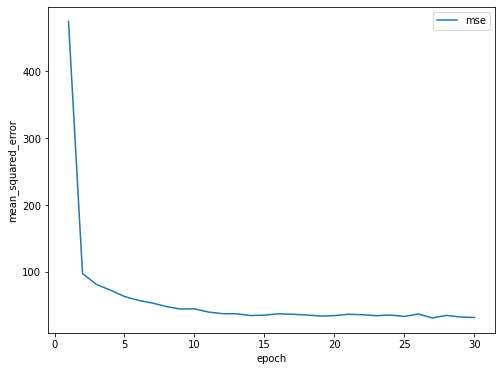

In [14]:
# MSE 학습 그래프
import matplotlib.pyplot as plt
plt.figure(figsize=[8, 6])
plt.plot(epoch, mse, label='mse')
plt.xlabel('epoch')
plt.ylabel('mean_squared_error')
plt.legend()
plt.show()
# epoch가 진행될수록 MSE가 감소하는 것을 확인할 수 있다.

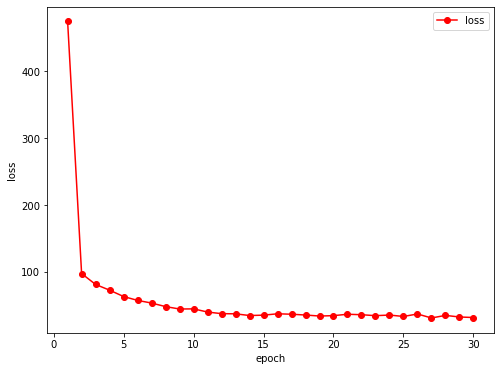

In [15]:
# 손실 그래프
plt.figure(figsize=[8, 6])
plt.plot(epoch, loss, 'r', marker='o', label='loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()
# 손실 확인 결과 에포크 진행 단계별로 손실이 점차 낮아지는 것을 볼 수 있다.

In [16]:
# 실제값, 예측값 데이터프레임 생성
pred_y = model.predict(X_te).flatten()
print(pred_y)

[14.926858  17.68186   26.267515   7.917684  15.005158  20.33469
 11.632039  22.128693  13.236667   7.889089   5.1158195  9.61797
 10.792668   2.5619862 33.263203  22.72695   13.689984  29.558794
 24.675909  21.299322  22.893751  17.08631   16.023733  26.365967
 21.479921  10.689122  17.379736  11.004315  28.346972  15.011754
 10.714337  12.856969  17.735548  20.255527  24.8231    12.98763
  4.140386  16.951506   6.4117637  6.4219794 22.591516  18.943966
 12.94563    9.773442  17.00797   23.849703  16.26448   14.620755
  7.636907  20.454527   7.7502265 11.073209  18.992067  22.401669
  7.765287  15.407378  17.322477  10.0682535 14.971913  18.075153
 16.16294   18.721216  24.99944   24.195602   9.034825  24.184431
 11.682729  13.96901    8.437734  20.76813   15.780751  17.59316
 26.882368  23.865847  16.954939  -1.2630564 27.121996  20.394733
 23.056791  16.387403  22.719763  17.167486  14.822988  28.526918
 28.235516  21.92799   20.246086   4.790792  24.334208   9.029683
  9.72614    4

In [17]:
import pandas as pd
result_df = pd.DataFrame(pred_y, columns=['predict_val'])
result_df['real_val'] = y_te
result_df

,predict_val,real_val
0,14.926858,22.6
1,17.681860,50.0
2,26.267515,23.0
3,7.917684,8.3
4,15.005158,21.2
...,...,...
122,15.863933,19.4
123,17.590742,21.2
124,22.656437,20.3
125,18.330112,18.8


In [18]:
# 예측값을 기준으로 데이터프레임을 오름차순으로 정렬한다.
df_sort = result_df.sort_values(['predict_val'], ascending=True)
df_sort

,predict_val,real_val
116,-3.866297,8.4
96,-3.027385,13.8
75,-1.263056,7.4
106,-1.138423,10.4
13,2.561986,10.5
...,...,...
83,28.526918,44.8
17,29.558794,33.3
126,30.232389,33.4
14,33.263203,50.0


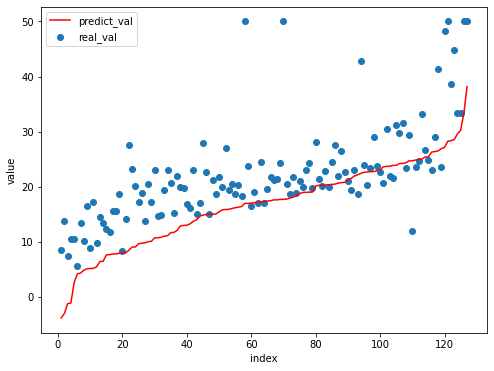

In [21]:
# 예측값, 실제값 비교 그래프
plt.figure(figsize=[8, 6])
idx = np.arange(1, len(df_sort) + 1)
plt.scatter(idx, df_sort['real_val'], marker='o', label='real_val')
plt.plot(idx, df_sort['predict_val'], color='r', label='predict_val')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()